In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import xgboost as xgb

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error,mean_absolute_error

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

root_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(root_dir)

from utils.utils import *
from utils.constants import *


In [6]:
# Load the model and its info
best_xgb_file = get_absolute_path(
    file_name = 'best_xgb_model.joblib'
    , rel_path = 'results'
)
best_xgb_model, best_xgb_model_info = load_model(best_xgb_file)


In [7]:
from utils.metrics import compute_metrics

In [22]:
type(best_xgb_model)

xgboost.sklearn.XGBRegressor

In [20]:
df_xgb = pd.DataFrame(
    {
    'forecast': best_xgb_model_info['y_pred_xgb'],
    'actual': best_xgb_model_info['y_test']['measurement']
    }
)

df_xgb.head()

,forecast,actual
0,0.661643,0.666667
1,0.707808,0.712963
2,0.701826,0.703704
3,0.716093,0.712963
4,0.712934,0.712963


In [21]:
compute_metrics(df_xgb, ['rmse','mape','wmape','wbias','wuforec','woforec'])

{'rmse': 0.011175057519623414,
 'mape': 0.009250693136714014,
 'wmape': 0.009400931450325702,
 'wbias': 0.000895572329365976,
 'wuforec': 0.005148251889845837,
 'woforec': 0.004252679560479863}

In [11]:
best_xgb_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [12]:
best_xgb_model_info

{'best_params': {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200},
 'best_score': -0.010995486877375305,
 'feature_importance': {'Dissolved oxygen, water, unfiltered, milligrams per liter (Maximum)': 0.4206678,
  'Location_ID_21989792.0': 0.11307047,
  'Location_ID_2344630.0': 0.017325148,
  'Week_48': 0.016722929,
  'Location_ID_2336120.0': 0.016282601,
  'Week_7': 0.015036047,
  'Month_3': 0.013135691,
  'Week_27': 0.0130669745,
  'Location_ID_2203900.0': 0.0128459,
  'Specific conductance, water, unfiltered, microsiemens per centimeter at 25 degrees Celsius (Mean)': 0.012762969,
  'Week_24': 0.012113629,
  'Location_ID_2203863.0': 0.012083458,
  'Dissolved oxygen, water, unfiltered, milligrams per liter (Minimum)': 0.011201285,
  'Location_ID_2336728.0': 0.010549389,
  'pH, water, unfiltered, field, standard units (Minimum)': 0.009754205,
  'Location_ID_2203831.0': 0.009589968,
  'Season_Fall': 0.009460324,
  'Location_ID_21989773.0': 0.009154055,
  'Month_12': 0.008467252

In [13]:
best_xgb_model_info.keys()

dict_keys(['best_params', 'best_score', 'feature_importance', 'y_pred_xgb', 'X_test_preprocessed_df', 'y_train', 'X_train_preprocessed_df', 'rmse_xgb'])

In [17]:
# Get the best hyperparameters and best model
best_params_xgb = best_xgb_model_info['best_params']

print("Best Hyperparameters:", best_params_xgb)

# Making predictions on the validation data using the best model
y_pred_xgb = best_xgb_model_info['y_pred_xgb']


# Calculating RMSE on the validation data
rmse_xgb = best_xgb_model_info['rmse_xgb']
print("XGBoost RMSE on Validation Data with Best Model:", rmse_xgb)


# reg_xgb = xgb.xgbMRegressor(objective='regression', metric='rmse', **best_params_xgb)
reg_xgb = best_xgb_model


xgbM_model=reg_xgb.fit(
    best_xgb_model_info['X_train_preprocessed_df'],
    best_xgb_model_info['y_train']    
)


Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
XGBoost RMSE on Validation Data with Best Model: 0.011175057519623414


/Users/yinpuli/opt/anaconda3/envs/py-311/lib/python3.11/site-packages/shap/utils/_clustering.py:34: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit
/Users/yinpuli/opt/anaconda3/envs/py-311/lib/python3.11/site-packages/shap/utils/_clustering.py:53: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit
/Users/yinpuli/opt/anaconda3/envs/py-311/lib/python3.11/site-p

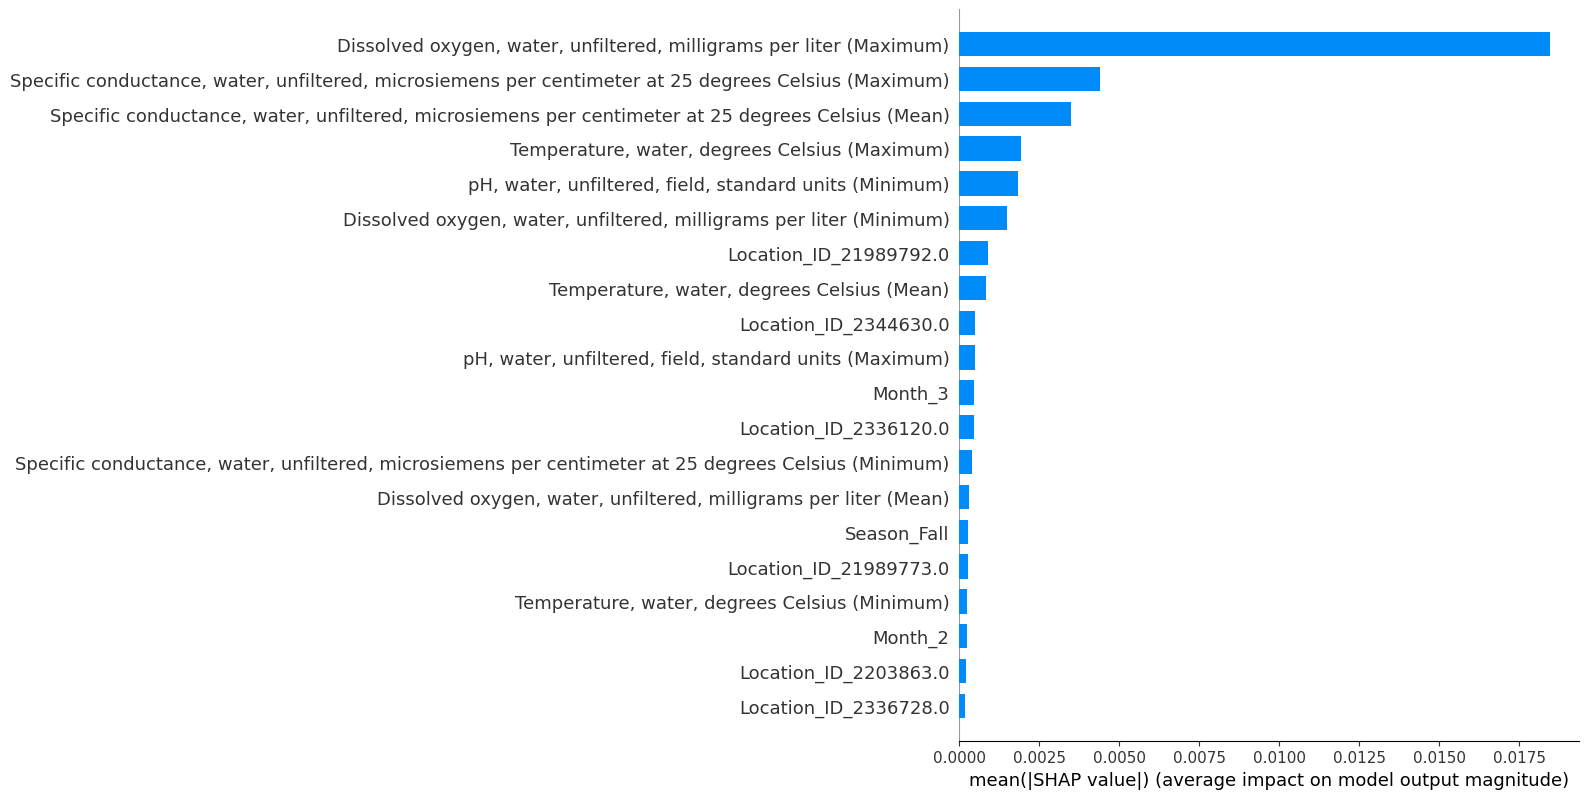

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.


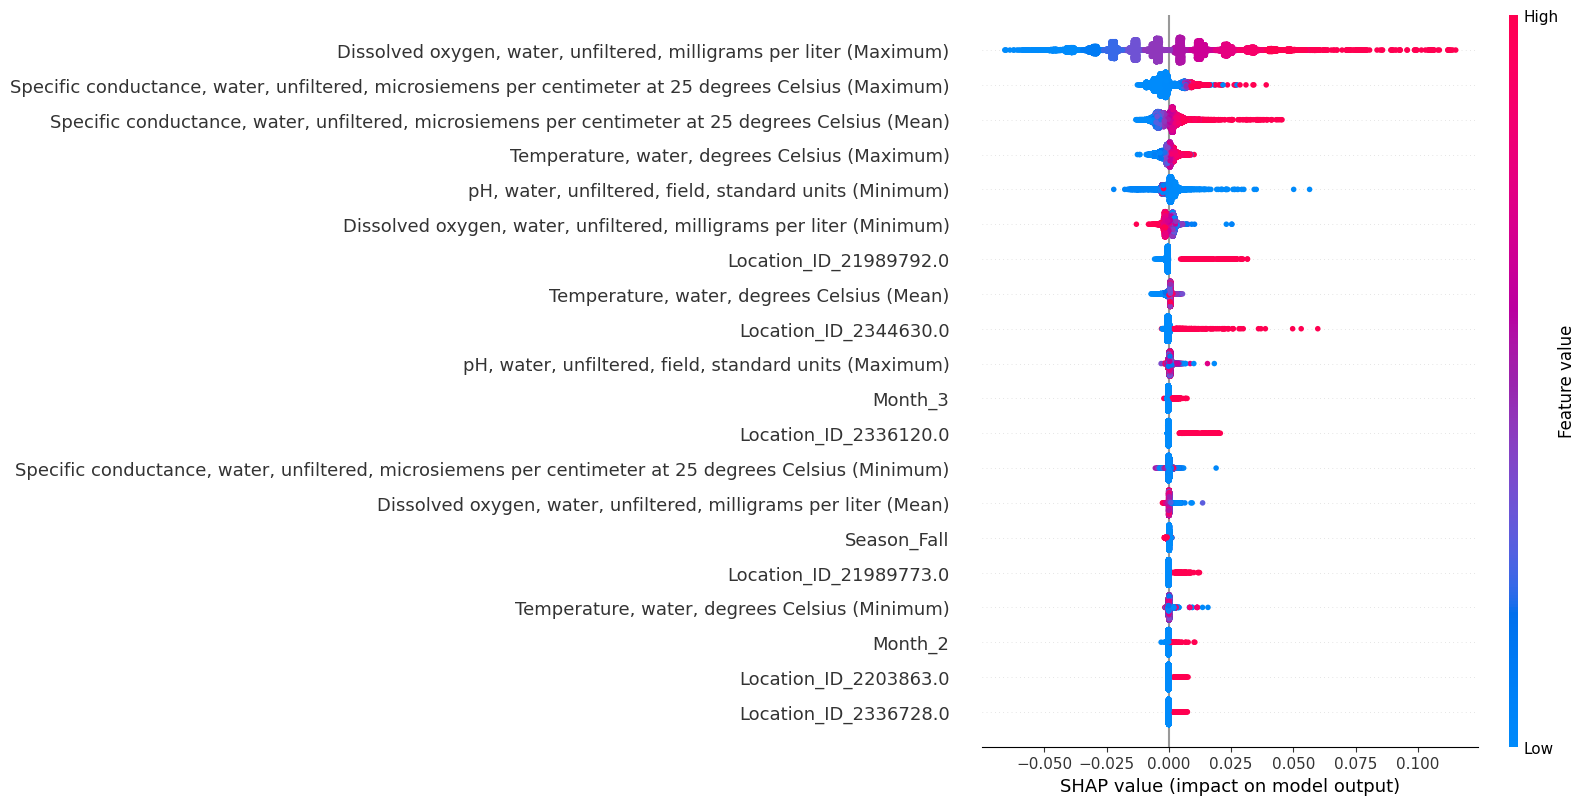

In [19]:


import shap
import numpy as np

# the below code is only for shap package
np.bool = np.bool_
np.int = np.int_

explainer_xgb = shap.TreeExplainer(xgbM_model)
shap_values_xgb = explainer_xgb.shap_values(best_xgb_model_info['X_train_preprocessed_df'],)
shap.summary_plot(shap_values_xgb, best_xgb_model_info['X_train_preprocessed_df'], plot_type="bar")

shap.summary_plot(shap_values_xgb, best_xgb_model_info['X_train_preprocessed_df'],)

In [20]:
best_xgb_model_info['X_train_preprocessed_df'].columns

Index(['Specific conductance, water, unfiltered, microsiemens per centimeter at 25 degrees Celsius (Maximum)',
       'pH, water, unfiltered, field, standard units (Maximum)',
       'pH, water, unfiltered, field, standard units (Minimum)',
       'Specific conductance, water, unfiltered, microsiemens per centimeter at 25 degrees Celsius (Minimum)',
       'Specific conductance, water, unfiltered, microsiemens per centimeter at 25 degrees Celsius (Mean)',
       'Dissolved oxygen, water, unfiltered, milligrams per liter (Maximum)',
       'Dissolved oxygen, water, unfiltered, milligrams per liter (Mean)',
       'Dissolved oxygen, water, unfiltered, milligrams per liter (Minimum)',
       'Temperature, water, degrees Celsius (Mean)',
       'Temperature, water, degrees Celsius (Minimum)',
       ...
       'Weekday_1', 'Weekday_2', 'Weekday_3', 'Weekday_4', 'Weekday_5',
       'Weekday_6', 'Season_Fall', 'Season_Spring', 'Season_Summer',
       'Season_Winter'],
      dtype='object', l

In [34]:
print(get_absolute_path(
    file_name = 'best_xgb_shap.png'
    , rel_path = 'results' + '/' + 'shap'
))

/Users/yinpuli/Documents/python-projects/water-quality-prediction/results/shap/best_xgb_shap.png


In [23]:
# Load the model and its info
best_rf_file = get_absolute_path(
    file_name = 'best_rf_model.joblib'
    , rel_path = 'results'
)
best_rf_model, best_rf_model_info = load_model(best_rf_file)


In [24]:
best_rf_model

RandomForestRegressor(min_samples_leaf=2, n_estimators=50)

In [25]:
type(best_rf_model)

sklearn.ensemble._forest.RandomForestRegressor

In [26]:
df_rf = pd.DataFrame(
    {
    'forecast': best_rf_model_info['y_pred_xgb'],
    'actual': best_rf_model_info['y_test']['measurement']
    }
)

df_xgb.head()

,forecast,actual
0,0.661643,0.666667
1,0.707808,0.712963
2,0.701826,0.703704
3,0.716093,0.712963
4,0.712934,0.712963


In [27]:
compute_metrics(df_xgb, ['rmse','mape','wmape','wbias','wuforec','woforec'])

{'rmse': 0.011175057519623414,
 'mape': 0.009250693136714014,
 'wmape': 0.009400931450325702,
 'wbias': 0.000895572329365976,
 'wuforec': 0.005148251889845837,
 'woforec': 0.004252679560479863}

In [29]:
best_rf_model_info.keys()

dict_keys(['best_params', 'best_score', 'rmse', 'feature_importance', 'y_pred_xgb', 'X_test_preprocessed_df', 'y_test', 'y_train', 'X_train_preprocessed_df', 'rmse_rf', 'mae_rf_mae'])

In [32]:
# Get the best hyperparameters and best model
best_params_rf = best_rf_model_info['best_params']

print("Best Hyperparameters:", best_params_rf)

# Making predictions on the validation data using the best model
y_pred_rf = best_rf_model_info['y_pred_rf']


# Calculating RMSE on the validation data
rmse_rf = best_rf_model_info['rmse_rf']
print("XGBoost RMSE on Validation Data with Best Model:", rmse_rf)


# reg_xgb = xgb.xgbMRegressor(objective='regression', metric='rmse', **best_params_xgb)
reg_rf = best_rf_model


rf_model=reg_rf.fit(
    best_rf_model_info['X_train_preprocessed_df'],
    best_rf_model_info['y_train']    
)


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
XGBoost RMSE on Validation Data with Best Model: 0.011727134999484173


/var/folders/sq/7q5rg1dn4c3_2sgl1c3xkrgh0000gn/T/ipykernel_41503/1679352089.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model=reg_rf.fit(


/Users/yinpuli/opt/anaconda3/envs/py-311/lib/python3.11/site-packages/shap/utils/_clustering.py:34: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit
/Users/yinpuli/opt/anaconda3/envs/py-311/lib/python3.11/site-packages/shap/utils/_clustering.py:53: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit
/Users/yinpuli/opt/anaconda3/envs/py-311/lib/python3.11/site-p

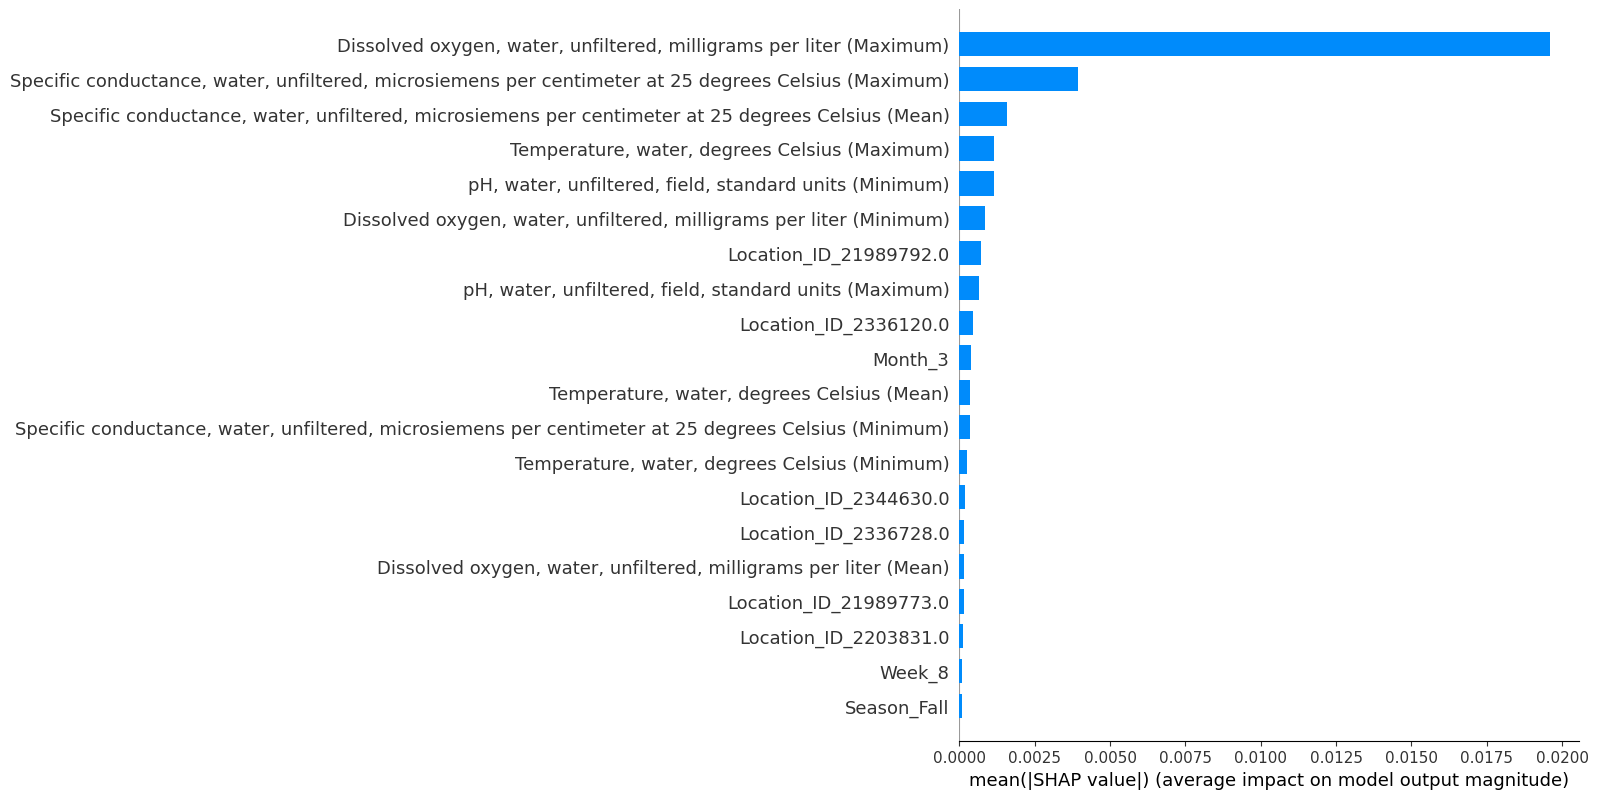

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.


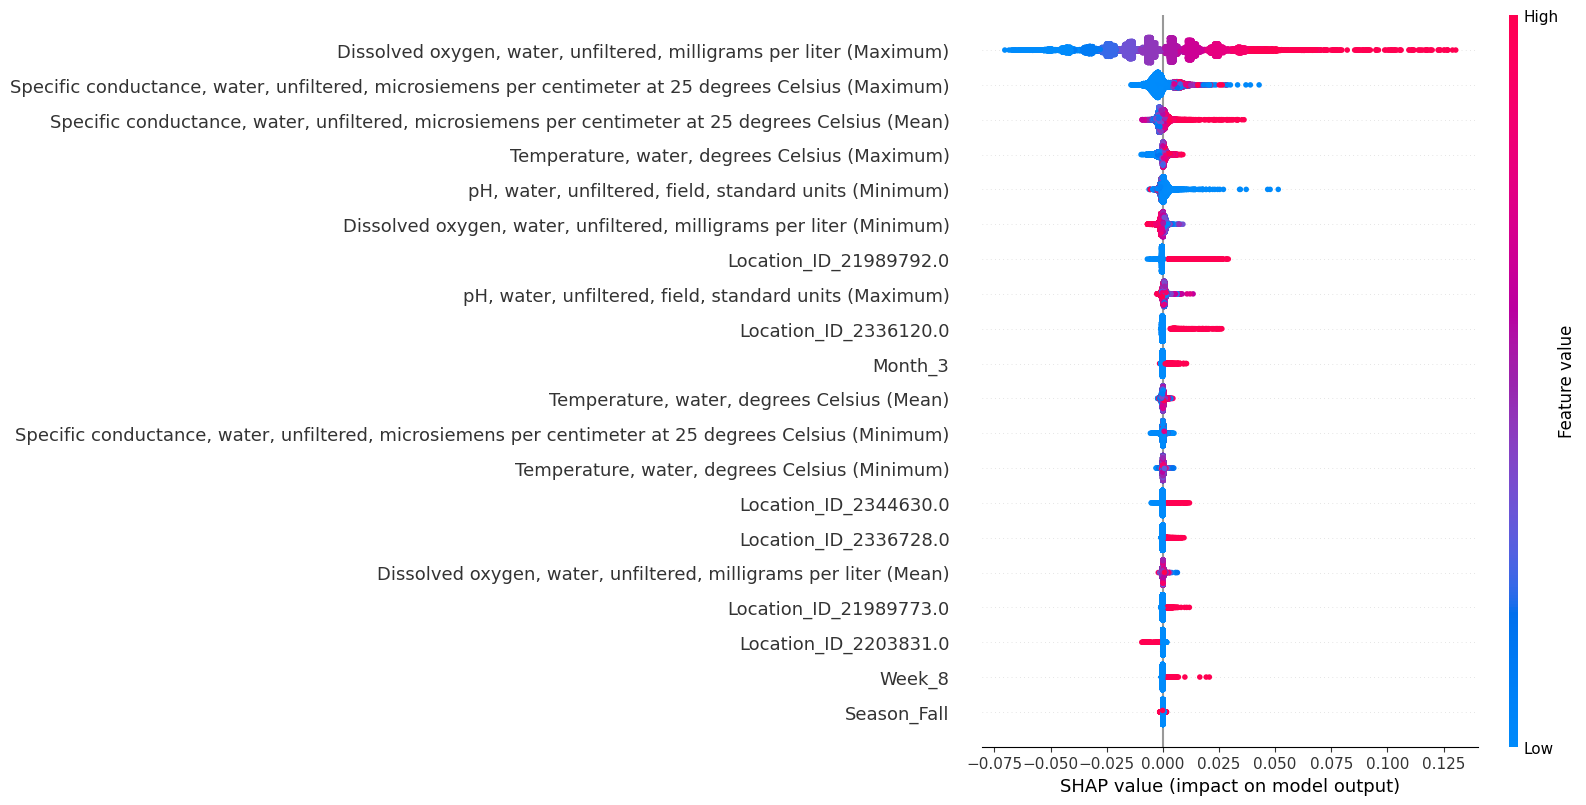

In [33]:


import shap
import numpy as np

# the below code is only for shap package
np.bool = np.bool_
np.int = np.int_

explainer_rf = shap.TreeExplainer(rf_model)
shap_values_rf = explainer_rf.shap_values(best_rf_model_info['X_train_preprocessed_df'],)
shap.summary_plot(shap_values_rf, best_rf_model_info['X_train_preprocessed_df'], plot_type="bar")

shap.summary_plot(shap_values_rf, best_rf_model_info['X_train_preprocessed_df'],)